In [8]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [2]:
df = pd.read_parquet("data.parquet")

In [3]:
print(f"Years in which orders were placed: {df['order_year'].unique()}.")
print(f"Years in which deliveries were made: {df['ship_year'].unique()}.")

Years in which orders were placed: [2016 2015 2014 2017].
Years in which deliveries were made: [2016 2015 2014 2017 2018].


In [4]:
sum_profit = df["profit"].sum()
sum_quantity = df["quantity"].sum()
median_profit = df["profit"].median()
min_profit = df["profit"].min()
max_profit =df["profit"].max()
print(f"Durchschnittlicher Profit pro Transaktion: {sum_profit / len(df)}")
print(f"Durchschnittlicher Profit pro Unit: {sum_profit/ sum_quantity}")
print(f"Median Profit pro Transaktion: {median_profit}")
print(f"Min-Value Profit einer Transaktion: {min_profit}")
print(f"Max-Value Profit einer Transaktion: {max_profit}")

Durchschnittlicher Profit pro Transaktion: 28.65689630778467
Durchschnittlicher Profit pro Unit: 7.562036852111002
Median Profit pro Transaktion: 8.6665
Min-Value Profit einer Transaktion: -6599.978
Max-Value Profit einer Transaktion: 8399.976


## Diagramme

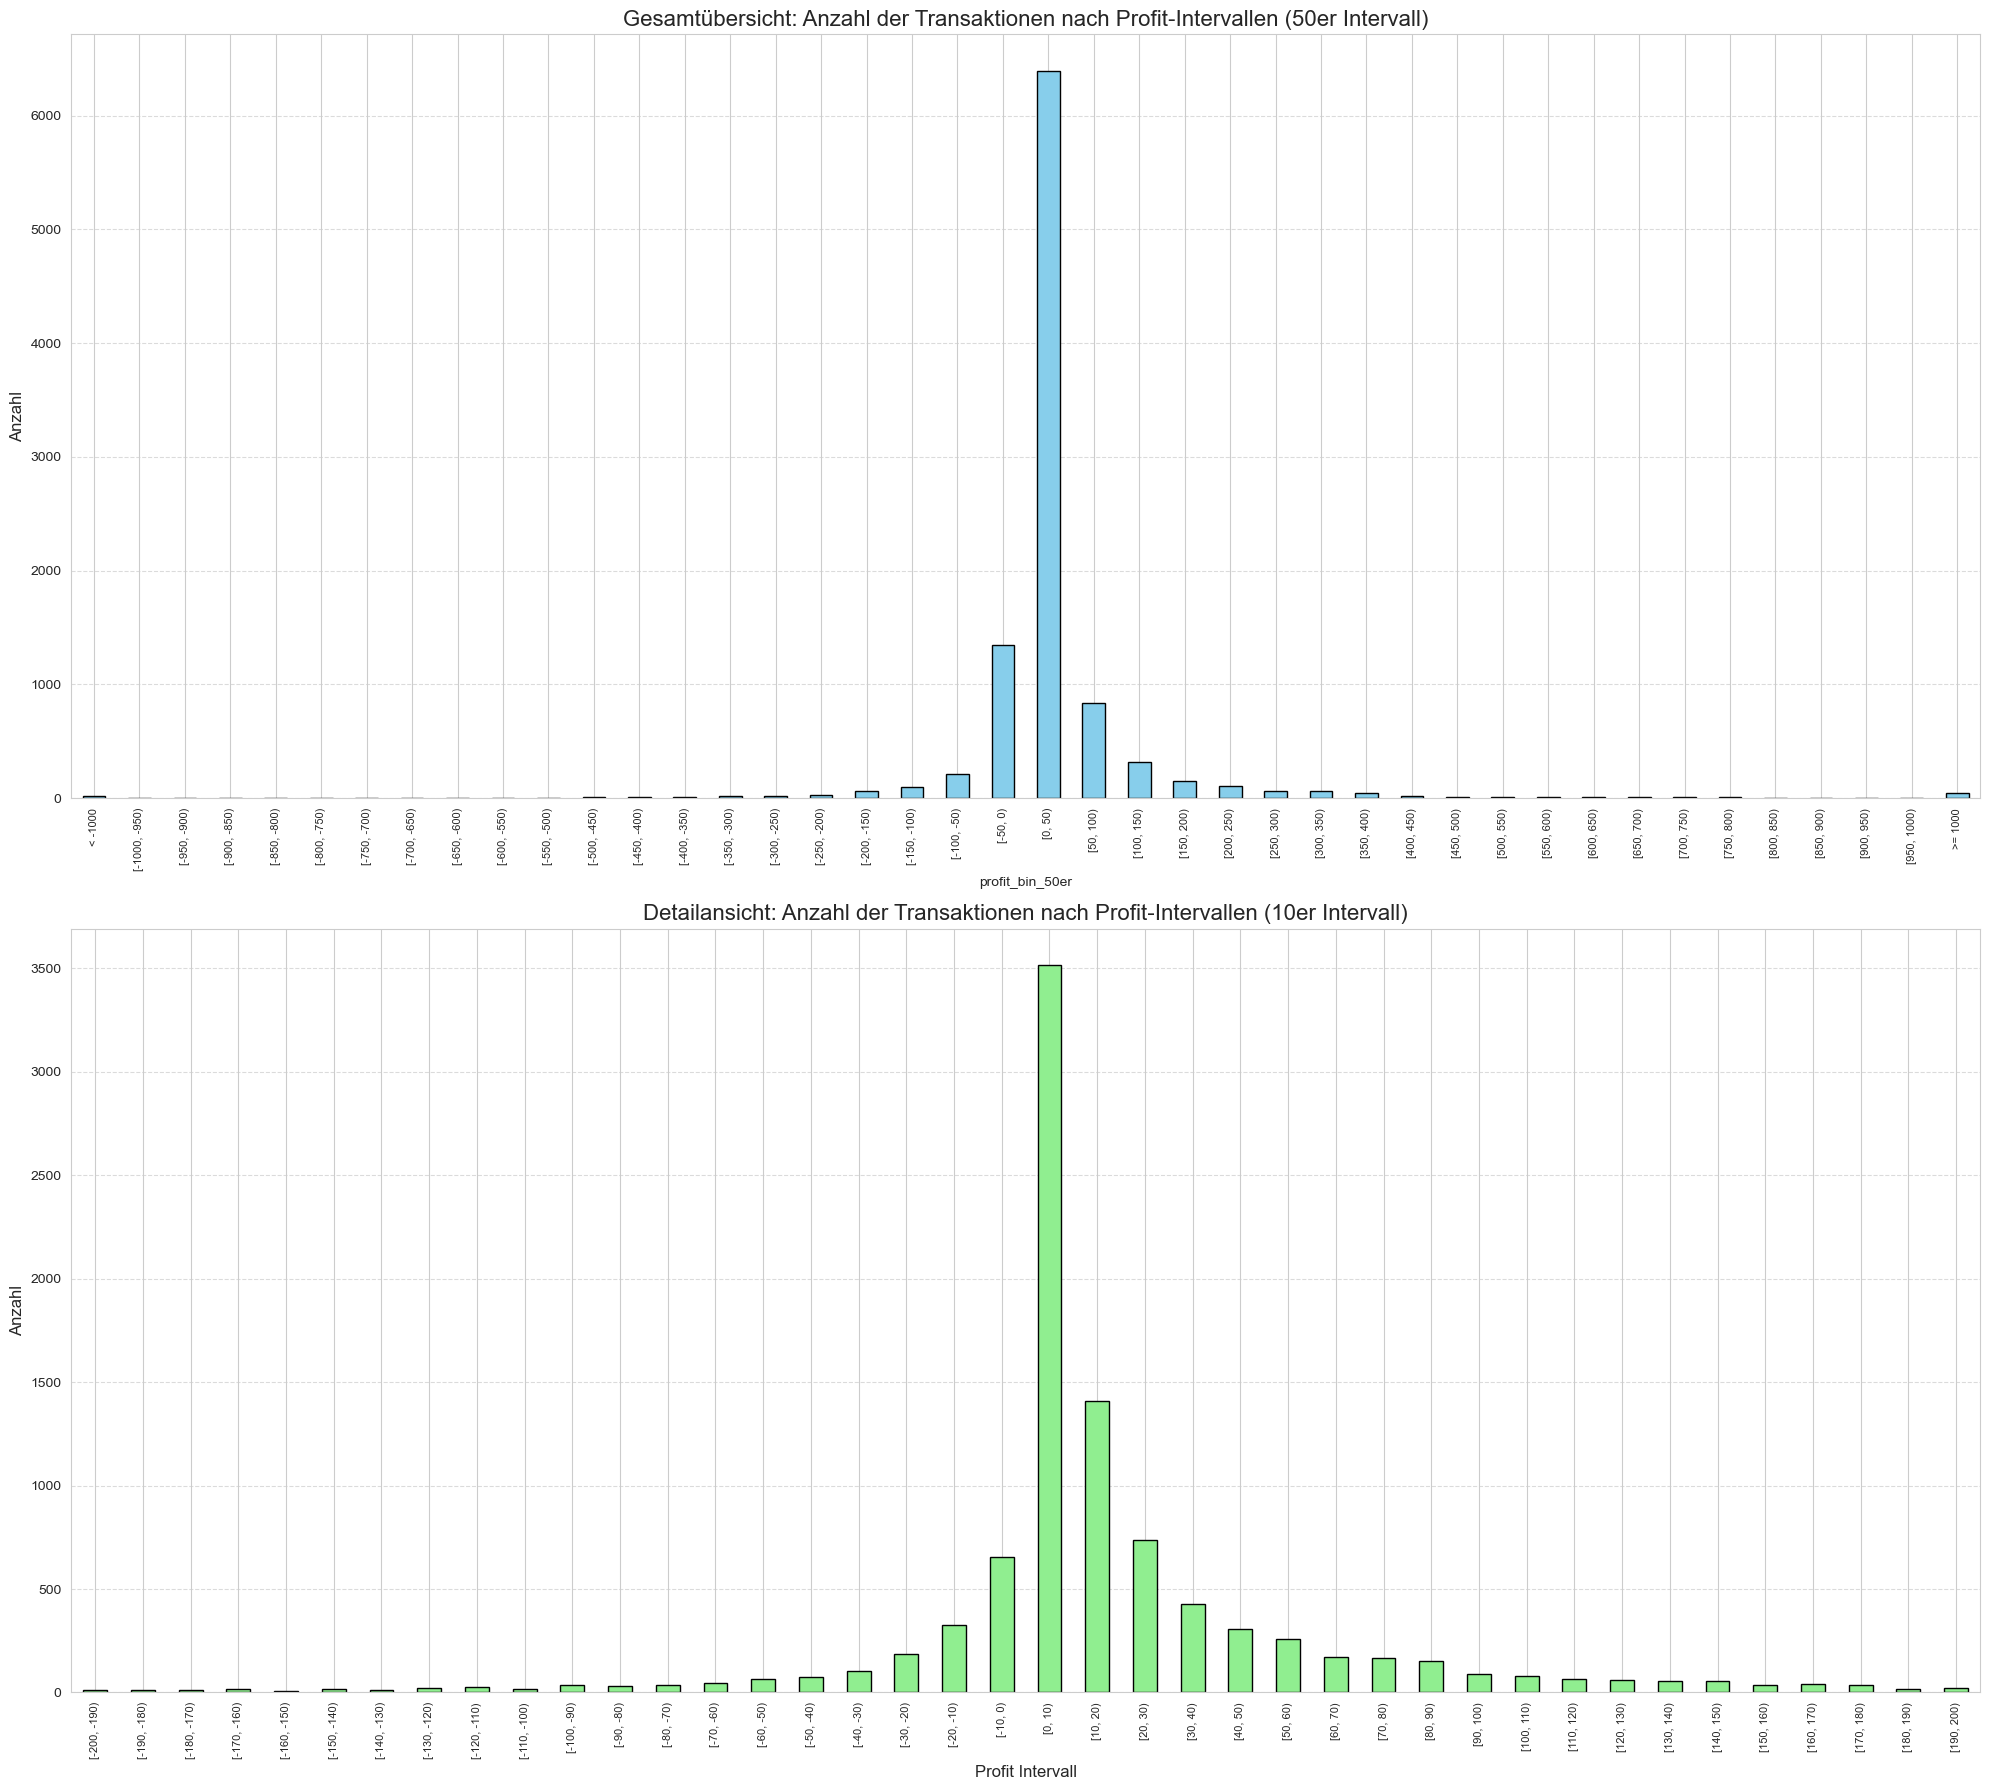

In [12]:
## Graph mit zwei Untergraphen initialisieren
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 18)) # Höhe auf 18 erhöht für Platz

## Berechnung für Plot 1
middle_bins = np.arange(-1000, 1001, 50)
bins = np.concatenate(([-np.inf], middle_bins, [np.inf]))
labels = ['< -1000'] + [f'[{middle_bins[i]}, {middle_bins[i+1]})' for i in range(len(middle_bins) - 1)] + ['>= 1000']
df['profit_bin_50er'] = pd.cut(df['profit'], bins=bins, labels=labels, right=False)
bin_counts = df['profit_bin_50er'].value_counts().sort_index()

## Anzeigen Plot 1
bin_counts.plot(kind='bar', color='skyblue', edgecolor='black', ax=ax1)
ax1.set_title('Gesamtübersicht: Anzahl der Transaktionen nach Profit-Intervallen (50er Intervall)', fontsize=16)
ax1.set_ylabel('Anzahl', fontsize=12)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.set_xticklabels(bin_counts.index, rotation=90, fontsize=8)

## Berechnung für Plot 2
mask = (df['profit'] >= -200) & (df['profit'] < 200)
df_zoomed = df.loc[mask].copy()
bins_zoomed = np.arange(-200, 201, 10)
labels_zoomed = [f'[{bins_zoomed[i]}, {bins_zoomed[i+1]})' for i in range(len(bins_zoomed) - 1)]
df_zoomed['profit_bin_10er'] = pd.cut(df_zoomed['profit'], bins=bins_zoomed, labels=labels_zoomed, right=False)
bin_counts_zoomed = df_zoomed['profit_bin_10er'].value_counts().sort_index()

## ANzeigen Plot 2
bin_counts_zoomed.plot(kind='bar', color='lightgreen', edgecolor='black', ax=ax2)
ax2.set_title('Detailansicht: Anzahl der Transaktionen nach Profit-Intervallen (10er Intervall)', fontsize=16)
ax2.set_xlabel('Profit Intervall', fontsize=12)
ax2.set_ylabel('Anzahl', fontsize=12)
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.set_xticklabels(bin_counts_zoomed.index, rotation=90, fontsize=8)

## Finalen Plot anzeigen
plt.tight_layout()
plt.show()

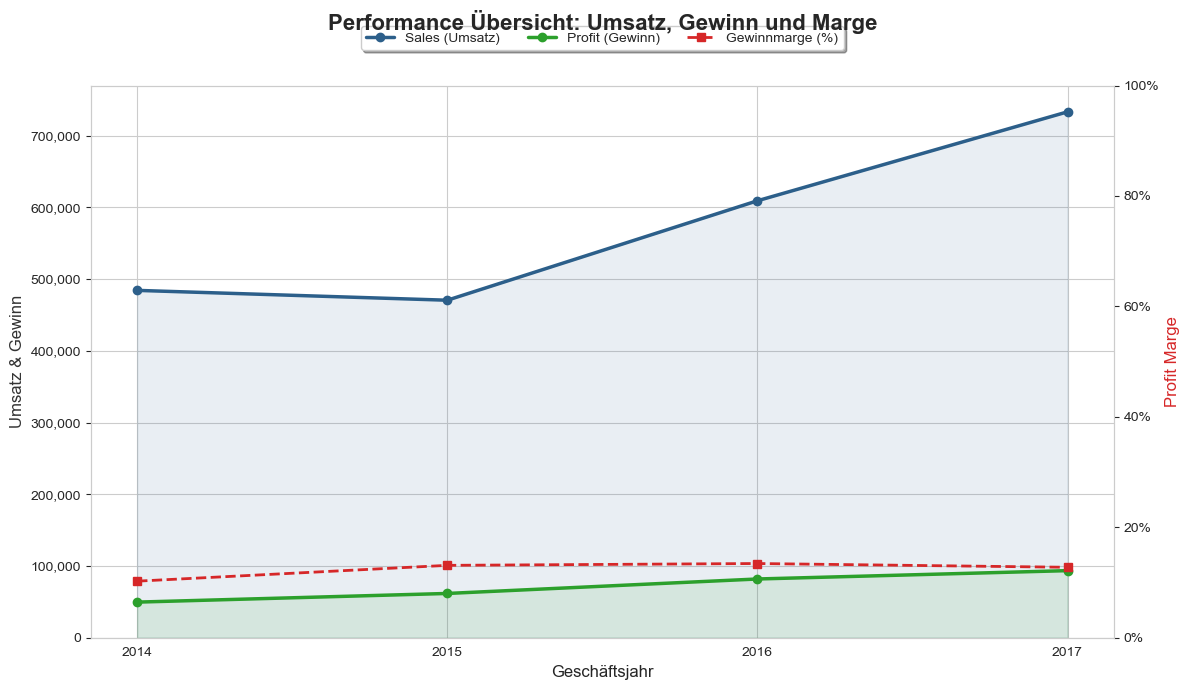

In [11]:
## Plot initialisieren
sns.set_style("whitegrid")
fig, ax1 = plt.subplots(figsize=(12, 7))
COLORS = {'sales':  '#2c5f8a', 'profit': '#2ca02c', 'margin': '#d62728'}

## Gruppieren nach Jahren / Berechnen der Kennzahlen
yearly_stats = df.groupby('order_year')[['sales', 'profit']].sum()
yearly_stats['margin'] = yearly_stats['profit'] / yearly_stats['sales']

## Umsatz/Sales Plot
ax1.plot(yearly_stats.index, yearly_stats['sales'], color=COLORS['sales'], marker='o', linewidth=2.5, label='Sales (Umsatz)')
ax1.fill_between(yearly_stats.index, yearly_stats['sales'], color=COLORS['sales'], alpha=0.1)

## Gewinn/Profit Plot
ax1.plot(yearly_stats.index, yearly_stats['profit'], color=COLORS['profit'], marker='o', linewidth=2.5, label='Profit (Gewinn)')
ax1.fill_between(yearly_stats.index, yearly_stats['profit'], color=COLORS['profit'], alpha=0.1)

## Formatierung der linken/absoluten Achse
ax1.set_xlabel('Geschäftsjahr', fontsize=12)
ax1.set_ylabel('Umsatz & Gewinn', color='#333333', fontsize=12)
ax1.set_ylim(bottom=0)
ax1.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

## Formatierung der rechten/relativen Achse
ax2 = ax1.twinx()
ax2.plot(yearly_stats.index, yearly_stats['margin'], color=COLORS['margin'], marker='s', linestyle='--', linewidth=2, label='Gewinnmarge (%)')
ax2.set_ylabel('Profit Marge', color=COLORS['margin'], fontsize=12)
ax2.set_ylim(0, 1)
ax2.yaxis.set_major_formatter(ticker.PercentFormatter(1.0))
ax2.grid(False)

## Legenden zusammenführen
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper center', bbox_to_anchor=(0.5, 1.12), ncol=3, frameon=True, shadow=True)

# Finalen Plot erstellen
plt.title('Performance Übersicht: Umsatz, Gewinn und Marge', fontsize=16, fontweight='bold', pad=40)
plt.tight_layout()
plt.show()

In [ ]:
## Plot Funktion für Diagramm
def draw_plot(ax, x_data, y_data, label, title="", ylabel="", 
                     linestyle='-', color=None, is_percent=False):
    
    ax.plot(x_data, y_data, 
            marker='o', 
            linewidth=2.5, 
            linestyle=linestyle, 
            label=label,
            color=color)
    
    if title:
        ax.set_title(title, fontweight='bold')
    if ylabel:
        ax.set_ylabel(ylabel)
        
    ax.grid(True, linestyle='--', alpha=0.7)
    
    if label:
        ax.legend(loc='upper left', fontsize='small')

    if is_percent:
        ax.yaxis.set_major_formatter(ticker.PercentFormatter())
        for x, y in zip(x_data, y_data):
            if pd.notnull(y):
                ax.text(x, y, 
                        f"{y:.1f}%", 
                        fontsize=9, ha='center', va='bottom', 
                        bbox=dict(facecolor='white', alpha=0.6, edgecolor='none', pad=0.5))

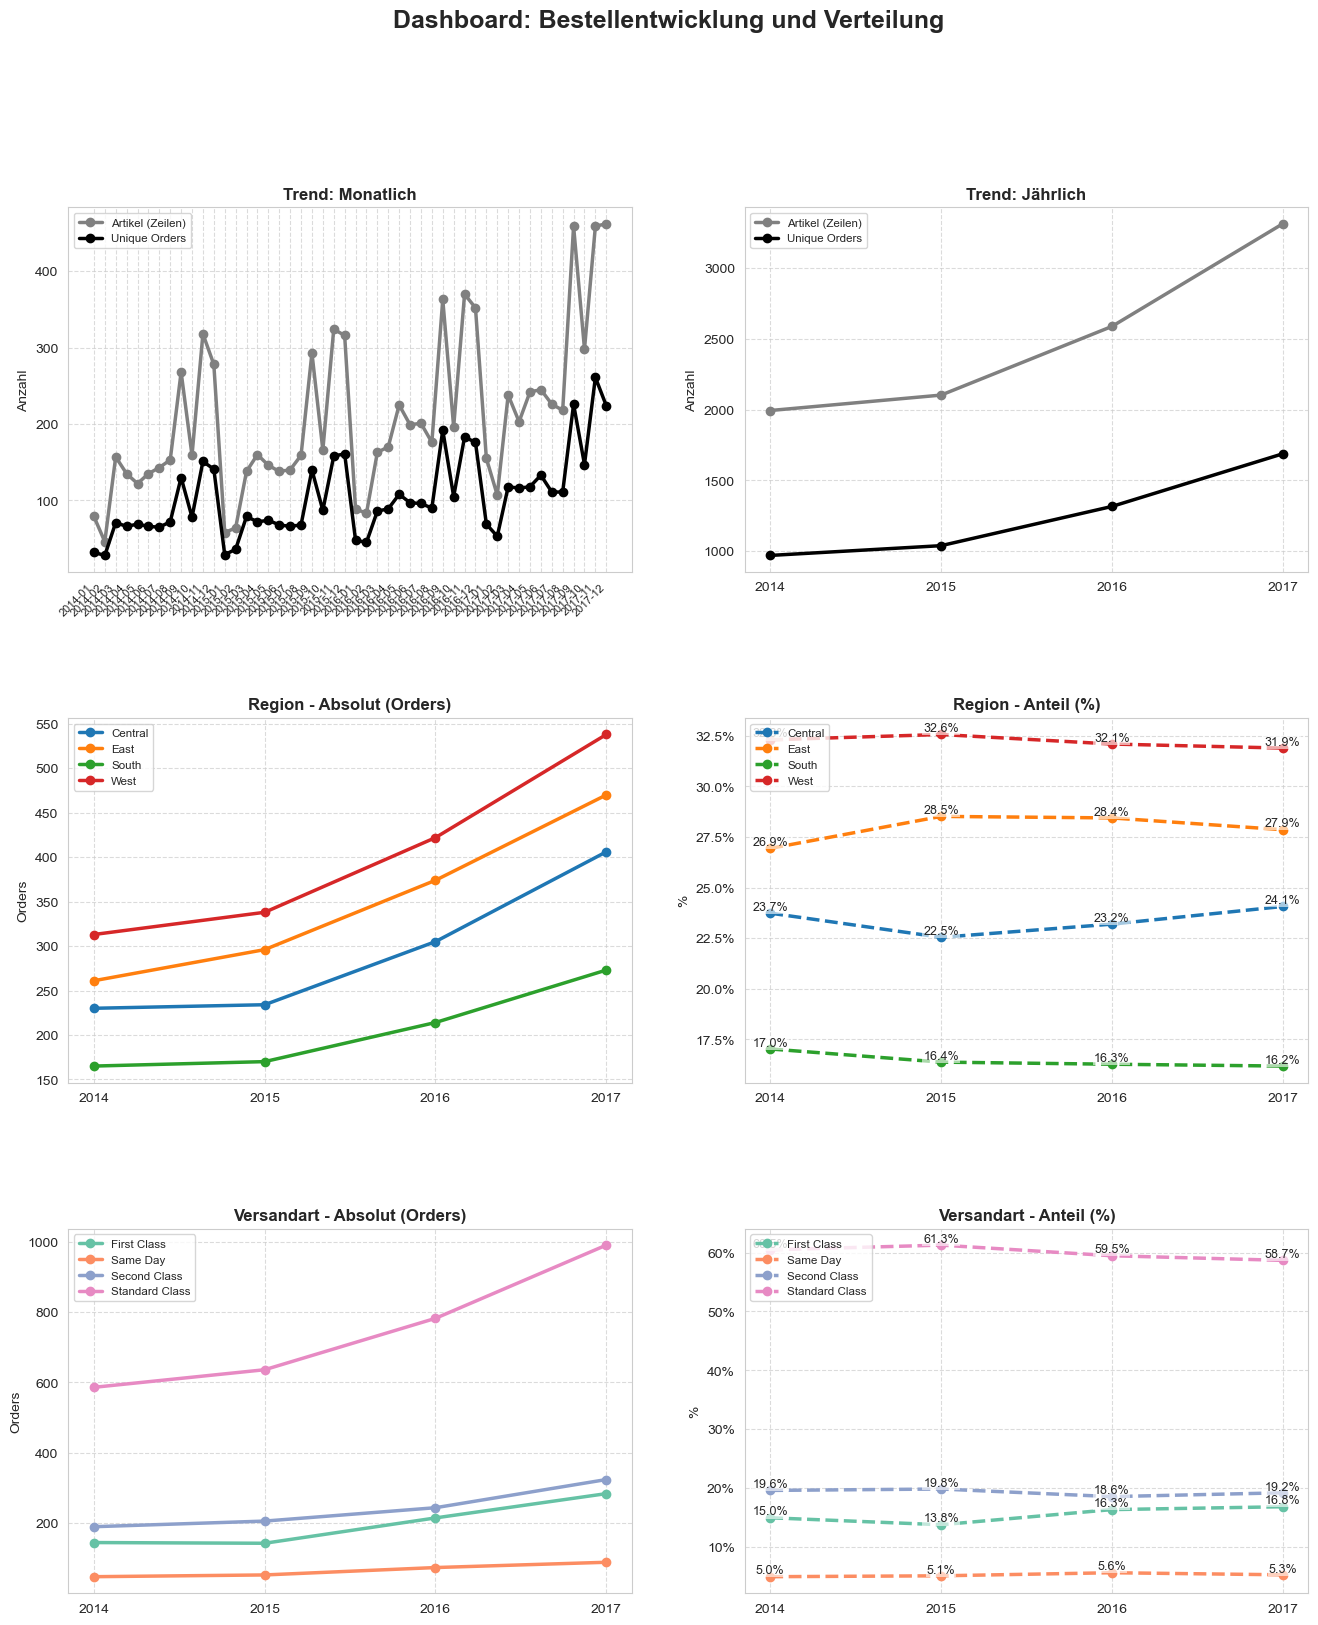

In [14]:
## Initialisieren vom Grid/Plot
sns.set_style("whitegrid")
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 18))
fig.suptitle('Dashboard: Bestellentwicklung und Verteilung', fontsize=18, fontweight='bold', y=0.99)
plt.subplots_adjust(hspace=0.4, wspace=0.2)

## Datenvorbereitung
# Datumsvariablen
df_analysis = df.copy(deep=True)
df_analysis['order_date'] = pd.to_datetime(df_analysis['order_date'])
df_analysis['order_month'] = df_analysis['order_date'].dt.to_period('M').astype(str)
years = sorted(df_analysis['order_year'].unique())
months = sorted(df_analysis['order_month'].unique())
yearly_totals = df_analysis.groupby('order_year')['order_id'].nunique()

# Aggregation: Allgemein
stats_monthly = df_analysis.groupby('order_month').agg(rows=('order_id', 'count'), orders=('order_id', 'nunique')).reset_index()
stats_yearly = df_analysis.groupby('order_year').agg(rows=('order_id', 'count'), orders=('order_id', 'nunique')).reset_index()

# Aggregation: Region
df_reg = df_analysis.groupby(['order_year', 'region'])['order_id'].nunique().reset_index()
df_reg = df_reg.merge(yearly_totals.rename('total'), on='order_year')
df_reg['pct'] = (df_reg['order_id'] / df_reg['total']) * 100

# Aggregation: Ship Mode
df_ship = df_analysis.groupby(['order_year', 'ship_mode'])['order_id'].nunique().reset_index()
df_ship = df_ship.merge(yearly_totals.rename('total'), on='order_year')
df_ship['pct'] = (df_ship['order_id'] / df_ship['total']) * 100

## Zeile 1: Allgemeine Plots
# Links:
ax_month = axes[0, 0]
draw_plot(ax_month, stats_monthly['order_month'], stats_monthly['rows'], label='Artikel (Zeilen)', title='Trend: Monatlich', ylabel='Anzahl', color='grey')
draw_plot(ax_month, stats_monthly['order_month'], stats_monthly['orders'], label='Unique Orders', color='black')
ax_month.set_xticks(range(len(months)))
ax_month.set_xticklabels(months, rotation=45, ha='right', fontsize=8)

# Rechts
ax_year = axes[0, 1]
draw_plot(ax_year, stats_yearly['order_year'], stats_yearly['rows'], label='Artikel (Zeilen)', title='Trend: Jährlich', ylabel='Anzahl', color='grey')
draw_plot(ax_year, stats_yearly['order_year'], stats_yearly['orders'],label='Unique Orders', color='black')
ax_year.set_xticks(years)

## Zeile 2: Region Plots
unique_regions = df_reg['region'].unique()
colors_reg = sns.color_palette("tab10", len(unique_regions))

for i, region in enumerate(unique_regions):
    subset = df_reg[df_reg['region'] == region]
    color = colors_reg[i]
    
    # Links: Absolut
    draw_plot(axes[1, 0], subset['order_year'], subset['order_id'], label=region, title='Region - Absolut (Orders)', ylabel='Orders', color=color)
    
    # Rechts: Relativ
    draw_plot(axes[1, 1], subset['order_year'], subset['pct'], label=region, title='Region - Anteil (%)', ylabel='%', linestyle='--', color=color, is_percent=True)

axes[1, 0].set_xticks(years)
axes[1, 1].set_xticks(years)

## zeile 3: Region Ship Mode
unique_modes = df_ship['ship_mode'].unique()
colors_ship = sns.color_palette("Set2", len(unique_modes))

for i, mode in enumerate(unique_modes):
    subset = df_ship[df_ship['ship_mode'] == mode]
    color = colors_ship[i]
    
    # Links: Absolut
    draw_plot(axes[2, 0], subset['order_year'], subset['order_id'], label=mode, title='Versandart - Absolut (Orders)', ylabel='Orders', color=color)
    
    # Rechts: Relativ
    draw_plot(axes[2, 1], subset['order_year'], subset['pct'], label=mode, title='Versandart - Anteil (%)', ylabel='%', linestyle='--', color=color, is_percent=True)

axes[2, 0].set_xticks(years)
axes[2, 1].set_xticks(years)

## Plot anzeigen
plt.show()

In [18]:
## Plot Funktion für Diagramm
def draw_plot_2(ax, x_data, y_data, label, title="", ylabel="", linestyle='-', color=None, is_percent=False):
    
    ax.plot(x_data, y_data, marker='o', linewidth=2.5, linestyle=linestyle, label=label, color=color)
    
    if title: ax.set_title(title, fontweight='bold')
    if ylabel: ax.set_ylabel(ylabel)
        
    ax.grid(True, linestyle='--', alpha=0.7)
    
    if label:
        handles, labels = ax.get_legend_handles_labels()
        if handles:
            ax.legend(handles, labels, loc='upper left', fontsize='small')

    if is_percent:
        ax.yaxis.set_major_formatter(ticker.PercentFormatter())

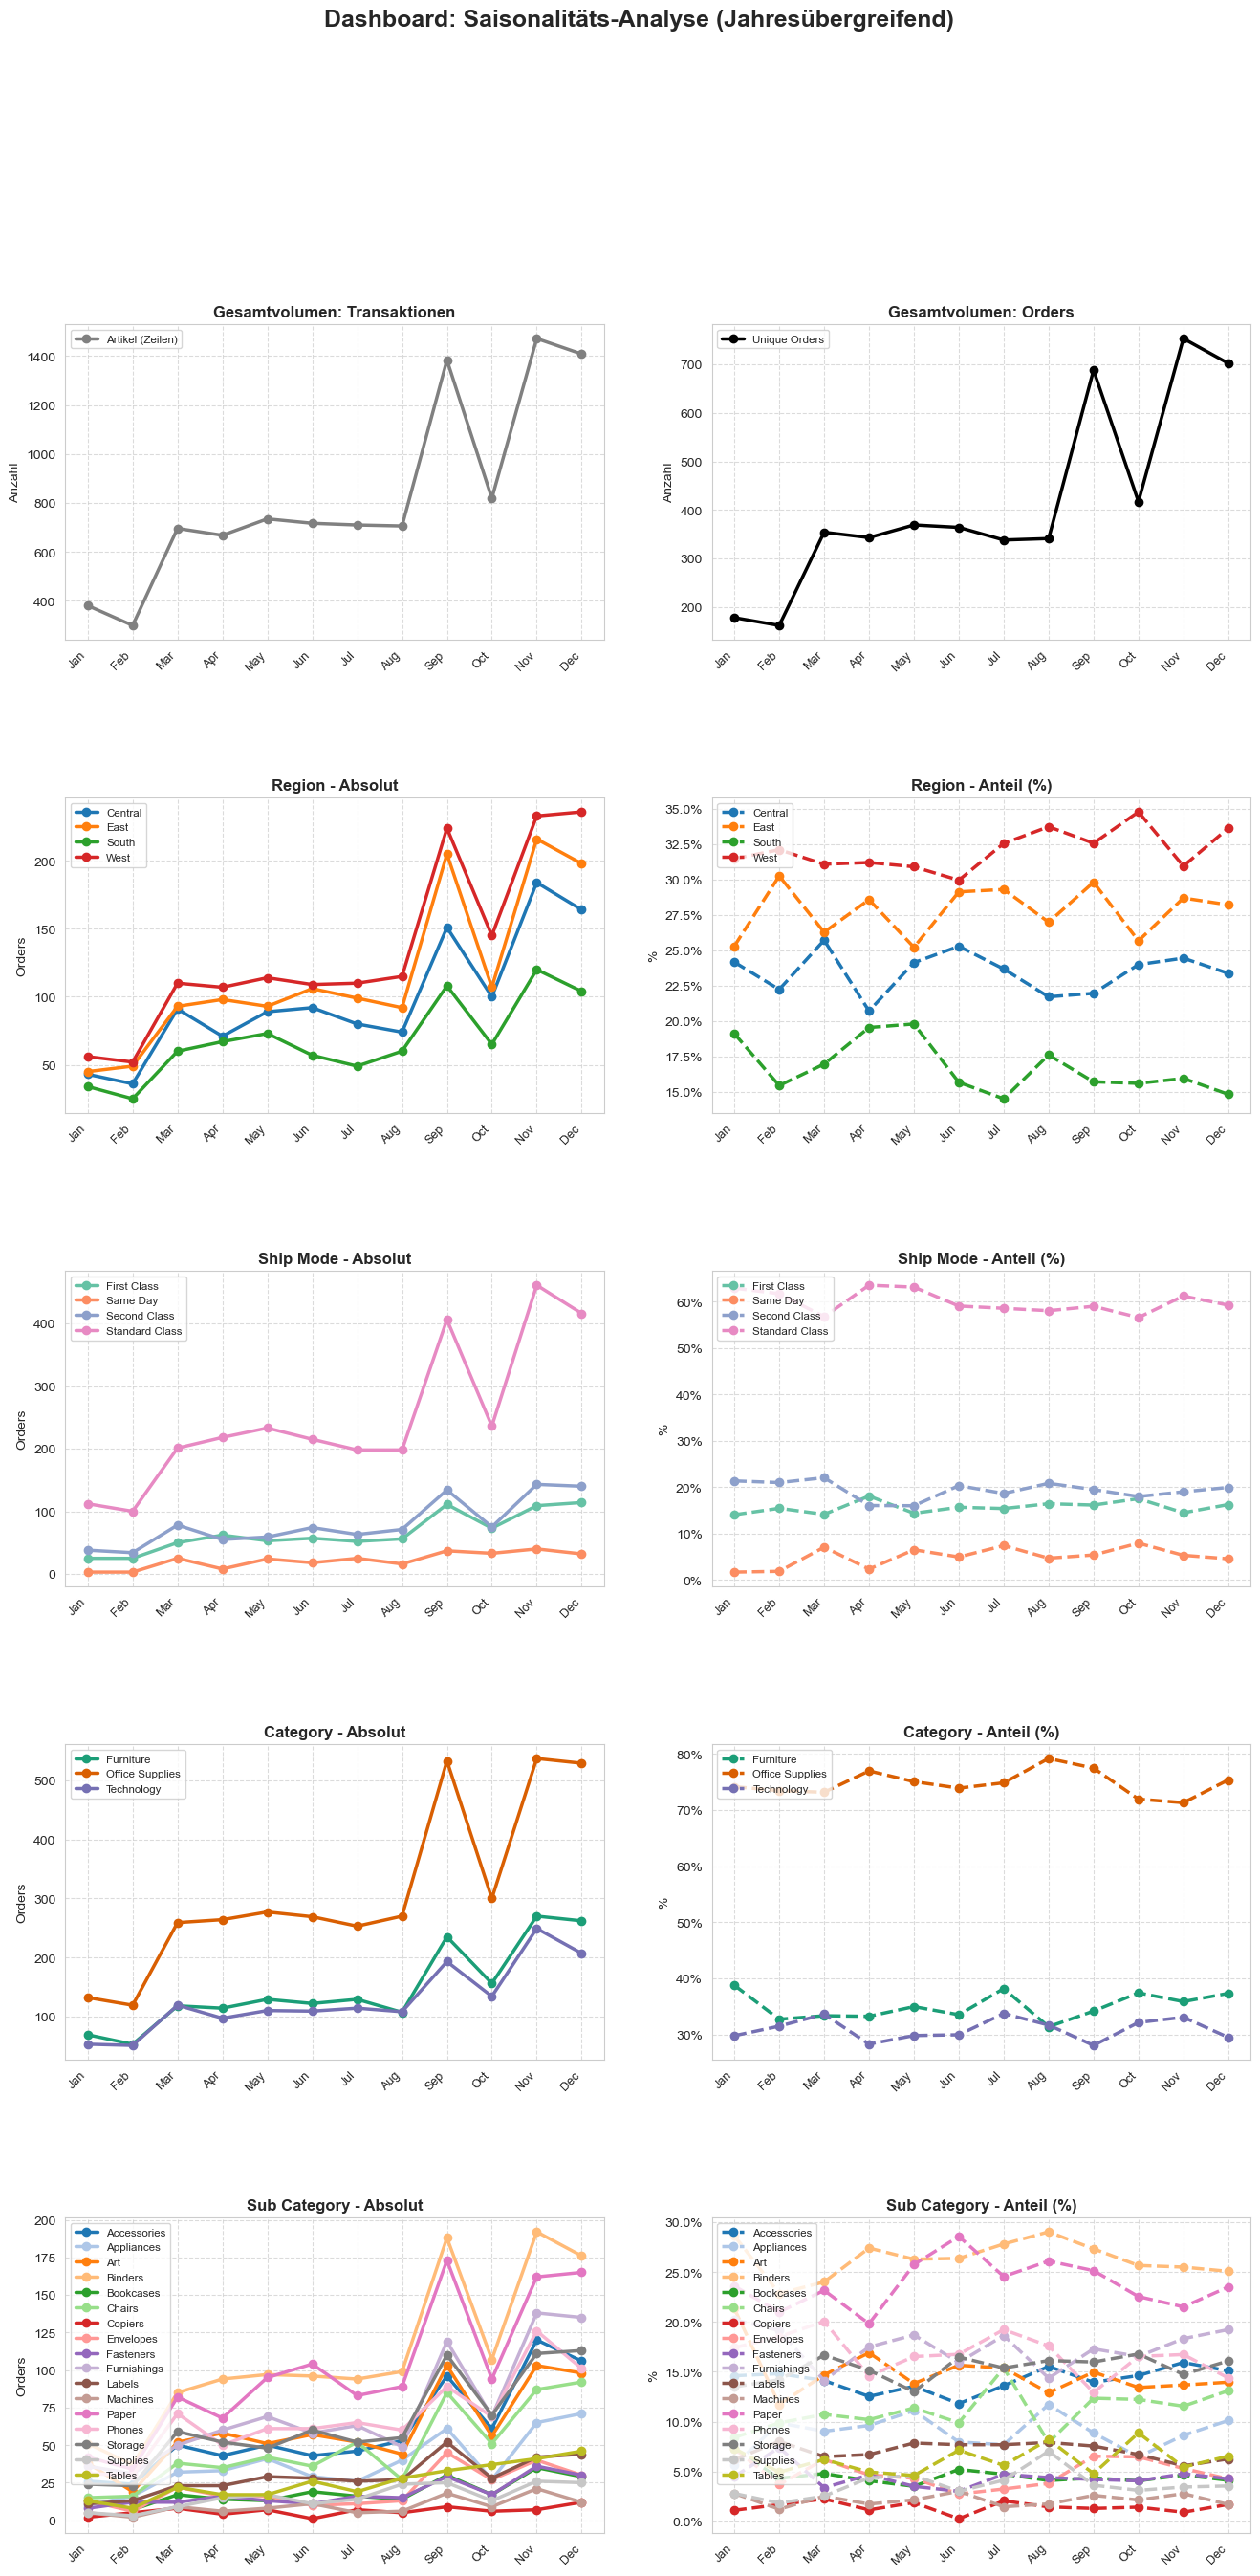

In [23]:
## Initialisieren vom Grid/Plot
sns.set_style("whitegrid")
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(16, 30))
fig.suptitle('Dashboard: Saisonalitäts-Analyse (Jahresübergreifend)', fontsize=18, fontweight='bold', y=0.99)
plt.subplots_adjust(hspace=0.5, wspace=0.2)
ax_gen_rows = axes[0, 0]
ax_gen_orders = axes[0, 1]


## Datenvorbereitung
def format_seasonal_axis(ax):
    """Setzt die X-Achse auf Jan-Dec"""
    months_txt = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    ax.set_xticks(range(1, 13))
    ax.set_xticklabels(months_txt, rotation=45, ha='right', fontsize=9)
    ax.set_xlim(0.5, 12.5)

df_seasonal = df.copy(deep=True)
df_seasonal['order_date'] = pd.to_datetime(df_seasonal['order_date'])
df_seasonal['month_int'] = df_seasonal['order_date'].dt.month
monthly_totals = df_seasonal.groupby('month_int')['order_id'].nunique()

# Aggregation: Allgemein
stats_seasonal = df_seasonal.groupby('month_int').agg(rows=('order_id', 'count'), orders=('order_id', 'nunique')).reset_index()

# Aggregation: Region
df_reg = df_seasonal.groupby(['month_int', 'region'])['order_id'].nunique().reset_index()
df_reg = df_reg.merge(monthly_totals.rename('total'), on='month_int')
df_reg['pct'] = (df_reg['order_id'] / df_reg['total']) * 100

# Aggregation: Ship Mode
df_ship = df_seasonal.groupby(['month_int', 'ship_mode'])['order_id'].nunique().reset_index()
df_ship = df_ship.merge(monthly_totals.rename('total'), on='month_int')
df_ship['pct'] = (df_ship['order_id'] / df_ship['total']) * 100

# Aggregation: Category
df_cat = df_seasonal.groupby(['month_int', 'category'])['order_id'].nunique().reset_index()
df_cat = df_cat.merge(monthly_totals.rename('total'), on='month_int')
df_cat['pct'] = (df_cat['order_id'] / df_cat['total']) * 100

# Aggregation: Sub Category
df_sub = df_seasonal.groupby(['month_int', 'sub_category'])['order_id'].nunique().reset_index()
df_sub = df_sub.merge(monthly_totals.rename('total'), on='month_int')
df_sub['pct'] = (df_sub['order_id'] / df_sub['total']) * 100

## Zeile 1: Allgemeine Plots
# Links: Artikel
draw_plot_2(ax_gen_rows, stats_seasonal['month_int'], stats_seasonal['rows'], label='Artikel (Zeilen)', title='Gesamtvolumen: Transaktionen', ylabel='Anzahl', color='grey')
format_seasonal_axis(ax_gen_rows)

# Rechts: Orders
draw_plot_2(ax_gen_orders, stats_seasonal['month_int'], stats_seasonal['orders'], label='Unique Orders', title='Gesamtvolumen: Orders', ylabel='Anzahl', color='black')
format_seasonal_axis(ax_gen_orders)

## ZEILE 2: REGION
unique_regions = df_reg['region'].unique()
colors_reg = sns.color_palette("tab10", len(unique_regions))

for i, region in enumerate(unique_regions):
    subset = df_reg[df_reg['region'] == region]
    c = colors_reg[i]
    
    # Links: Absolut
    draw_plot_2(axes[1, 0], subset['month_int'], subset['order_id'], label=region, title='Region - Absolut', ylabel='Orders', color=c)
    
    # Rechts: Relativ
    draw_plot_2(axes[1, 1], subset['month_int'], subset['pct'], label=region, title='Region - Anteil (%)', ylabel='%', linestyle='--', color=c, is_percent=True)

format_seasonal_axis(axes[1, 0])
format_seasonal_axis(axes[1, 1])

## ZEILE 3: SHIP MODE
unique_modes = df_ship['ship_mode'].unique()
colors_ship = sns.color_palette("Set2", len(unique_modes))

for i, mode in enumerate(unique_modes):
    subset = df_ship[df_ship['ship_mode'] == mode]
    c = colors_ship[i]
    
    draw_plot_2(axes[2, 0], subset['month_int'], subset['order_id'], label=mode, title='Ship Mode - Absolut', ylabel='Orders', color=c)
    draw_plot_2(axes[2, 1], subset['month_int'], subset['pct'], label=mode, title='Ship Mode - Anteil (%)', ylabel='%', linestyle='--', color=c, is_percent=True)

format_seasonal_axis(axes[2, 0])
format_seasonal_axis(axes[2, 1])

## ZEILE 4: CATEGORY
unique_cats = df_cat['category'].unique()
colors_cat = sns.color_palette("Dark2", len(unique_cats))

for i, cat in enumerate(unique_cats):
    subset = df_cat[df_cat['category'] == cat]
    c = colors_cat[i]
    
    draw_plot_2(axes[3, 0], subset['month_int'], subset['order_id'], label=cat, title='Category - Absolut', ylabel='Orders', color=c) 
    draw_plot_2(axes[3, 1], subset['month_int'], subset['pct'], label=cat, title='Category - Anteil (%)', ylabel='%', linestyle='--', color=c, is_percent=True)

format_seasonal_axis(axes[3, 0])
format_seasonal_axis(axes[3, 1])

## ZEILE 5: SUB-CATEGORY
unique_subs = df_sub['sub_category'].unique()
colors_sub = sns.color_palette("tab20", len(unique_subs))

for i, sub in enumerate(unique_subs):
    subset = df_sub[df_sub['sub_category'] == sub]
    c = colors_sub[i]
    
    draw_plot_2(axes[4, 0], subset['month_int'], subset['order_id'], label=sub, title='Sub Category - Absolut', ylabel='Orders', color=c)
    draw_plot_2(axes[4, 1], subset['month_int'], subset['pct'], label=sub, title='Sub Category - Anteil (%)', ylabel='%', linestyle='--', color=c, is_percent=True)

format_seasonal_axis(axes[4, 0])
format_seasonal_axis(axes[4, 1])

## Plot anzeigen
plt.show()


## Heatmaps

In [20]:
# Boxplots
def gen_plot(
        df_values, 
        df_devide_values=None, 
        title="Platzhalter Titel", 
        xlabel="Platzhalter xlabel", 
        ylabel="Platzhalter ylabel", 
        figsize=(10, 8),
        ax=None
        ):
    
    # Berechnung der Werte
    if df_devide_values is not None:
        values = df_values / df_devide_values
    else:
        values = df_values

    # Wenn keine Achse übergeben wurde neue Figur erstellen
    if ax is None:
        plt.figure(figsize=figsize)
        ax = plt.gca()

    # Heatmap auf der vorgegebenen Achse zeichnen
    sns.heatmap(values, 
                annot=True, 
                fmt=".2f",       
                cmap="RdYlGn",   
                center=0,       
                linewidths=.5,
                cbar_kws={'label': 'Durchschnittsgewinn'},
                ax=ax)

    # Titel und Label auf die Achse setzen
    ax.set_title(title, fontsize=14)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.tick_params(axis='both', labeltop=True, labelbottom=False)

    if ax is None: 
        plt.tight_layout()
        plt.show()

In [22]:
## SUB CATEGORY / REGION
df_profit_sum_sub_category_region = df.pivot_table(index='sub_category', columns='region', values='profit', aggfunc='sum')
df_quantity_sum_sub_category_region = df.pivot_table(index='sub_category', columns='region', values='quantity', aggfunc='sum')
## CATEGORY / REGION
df_profit_sum_category_region = df.pivot_table(index='category', columns='region', values='profit', aggfunc='sum')
df_quantity_sum_category_region = df.pivot_table(index='category', columns='region', values='quantity', aggfunc='sum')
## REGION / SEGMENT
df_profit_sum_segment_region = df.pivot_table(index='segment', columns='region', values='profit', aggfunc='sum')
df_quantity_sum_segment_region = df.pivot_table(index='segment', columns='region', values='quantity', aggfunc='sum')
## SUB CATEGORY / SEGMENT
df_profit_sum_sub_category_segment = df.pivot_table(index='sub_category', columns='segment', values='profit', aggfunc='sum')
df_quantity_sum_sub_category_segment = df.pivot_table(index='sub_category', columns='segment', values='quantity', aggfunc='sum')
## DISCOUNT / SEGMENT
df_profit_sum_discount_segment = df.pivot_table(index='discount', columns='segment', values='profit', aggfunc='sum')
df_quantity_sum_discount_segment = df.pivot_table(index='discount', columns='segment', values='quantity', aggfunc='sum')
## DISCOUNT / SEGMENT
df_profit_sum_sub_category_month = df.pivot_table(index='sub_category', columns='order_month', values='profit', aggfunc='sum')
df_quantity_sum_sub_category_month = df.pivot_table(index='sub_category', columns='order_month', values='quantity', aggfunc='sum')
## SUB CATEGORY / MONTH
df_profit_sum_category_month = df.pivot_table(index='category', columns='order_month', values='profit', aggfunc='sum')
df_quantity_sum_category_month = df.pivot_table(index='category', columns='order_month', values='quantity', aggfunc='sum')

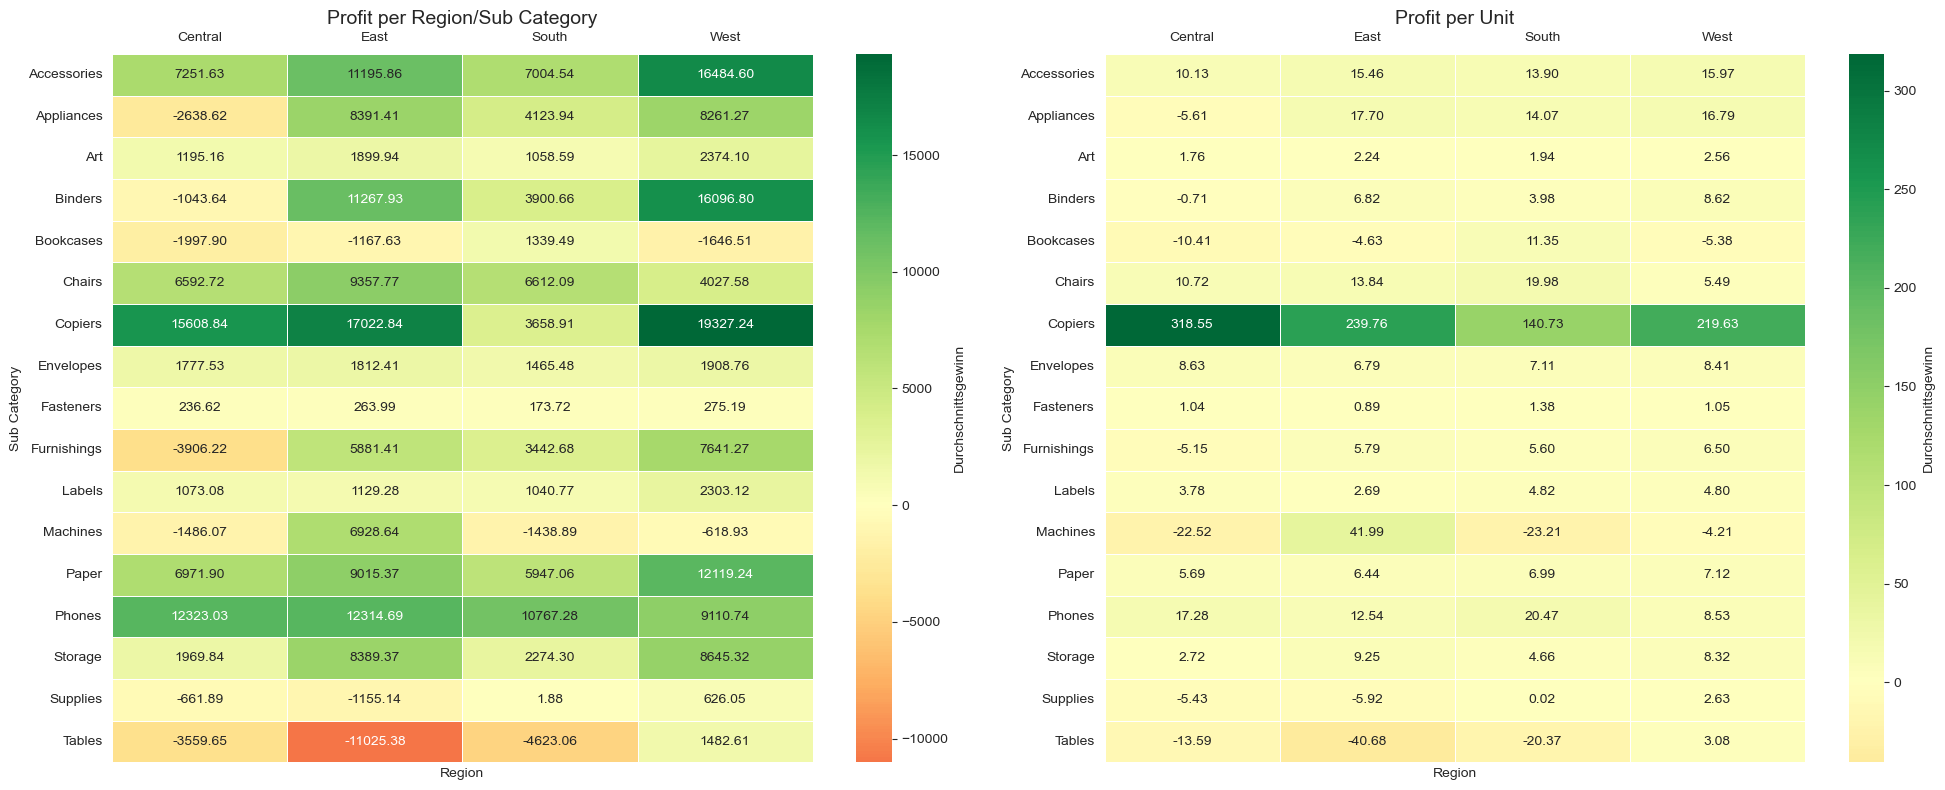

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8)) 

gen_plot(
    df_profit_sum_sub_category_region, 
    None, 
    "Profit per Region/Sub Category", 
    "Region", 
    "Sub Category", 
    ax=ax1
)

gen_plot(
    df_profit_sum_sub_category_region, 
    df_quantity_sum_sub_category_region, 
    "Profit per Unit", 
    "Region", 
    "Sub Category", 
    ax=ax2
)

plt.tight_layout()
plt.show()

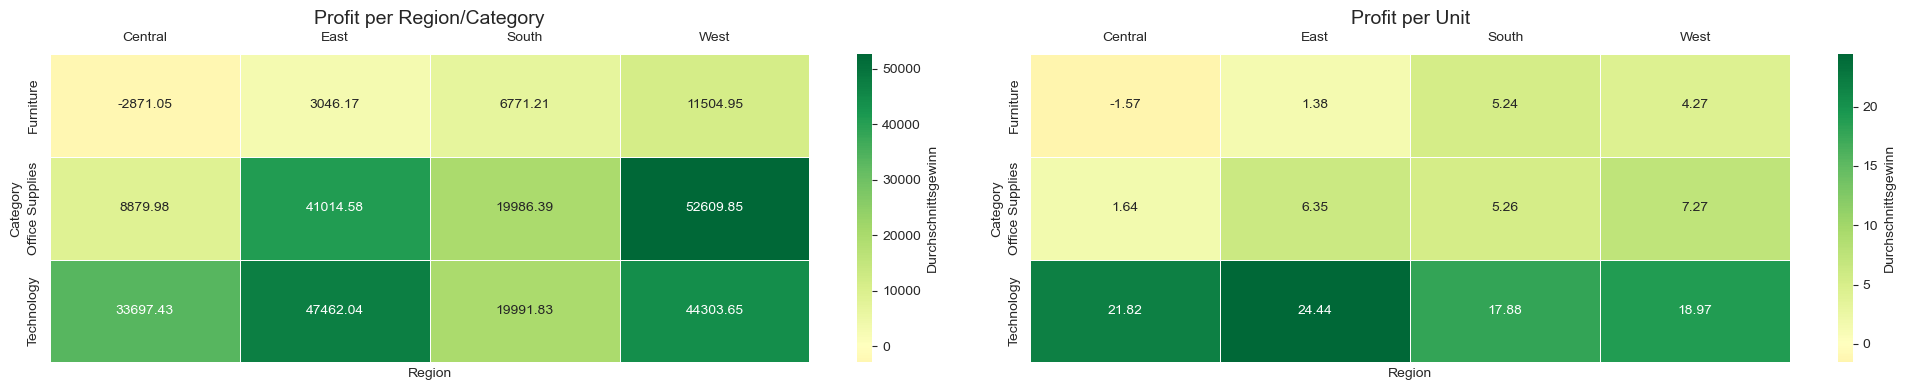

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4)) 
gen_plot(
    df_profit_sum_category_region, 
    None, 
    "Profit per Region/Category", 
    "Region", 
    "Category", 
    ax=ax1
)
gen_plot(
    df_profit_sum_category_region, 
    df_quantity_sum_category_region, 
    "Profit per Unit", 
    "Region", 
    "Category", 
    ax=ax2
)
plt.tight_layout()
plt.show()

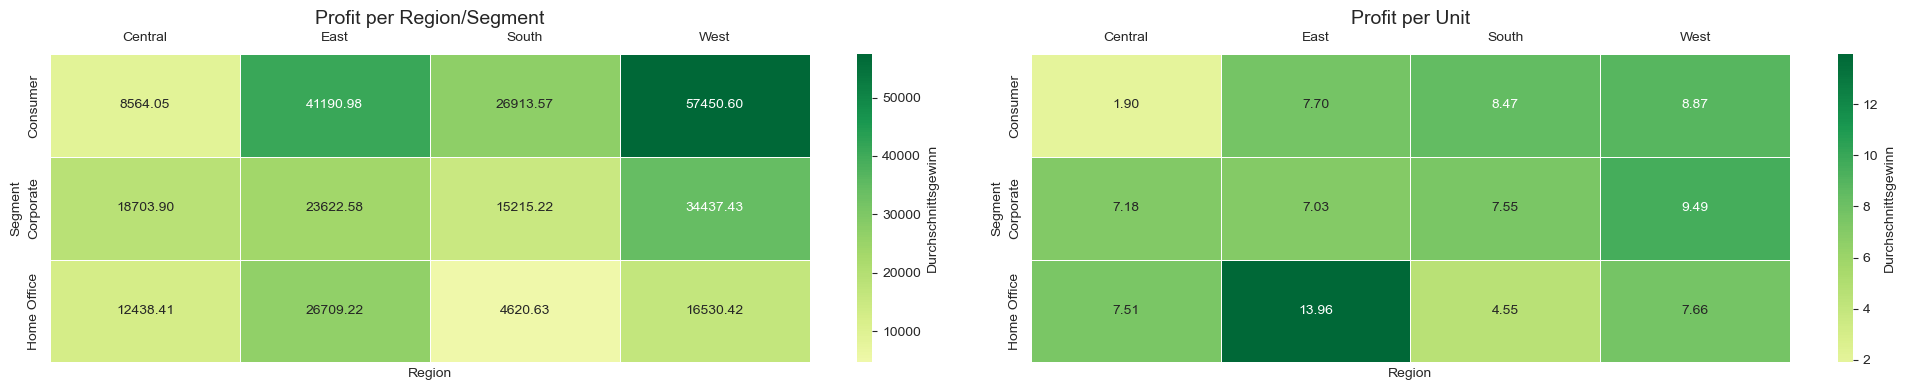

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4)) 
gen_plot(
    df_profit_sum_segment_region, 
    None, 
    "Profit per Region/Segment", 
    "Region", 
    "Segment", 
    ax=ax1
)
gen_plot(
    df_profit_sum_segment_region, 
    df_quantity_sum_segment_region, 
    "Profit per Unit", 
    "Region", 
    "Segment", 
    ax=ax2
)
plt.tight_layout()
plt.show()

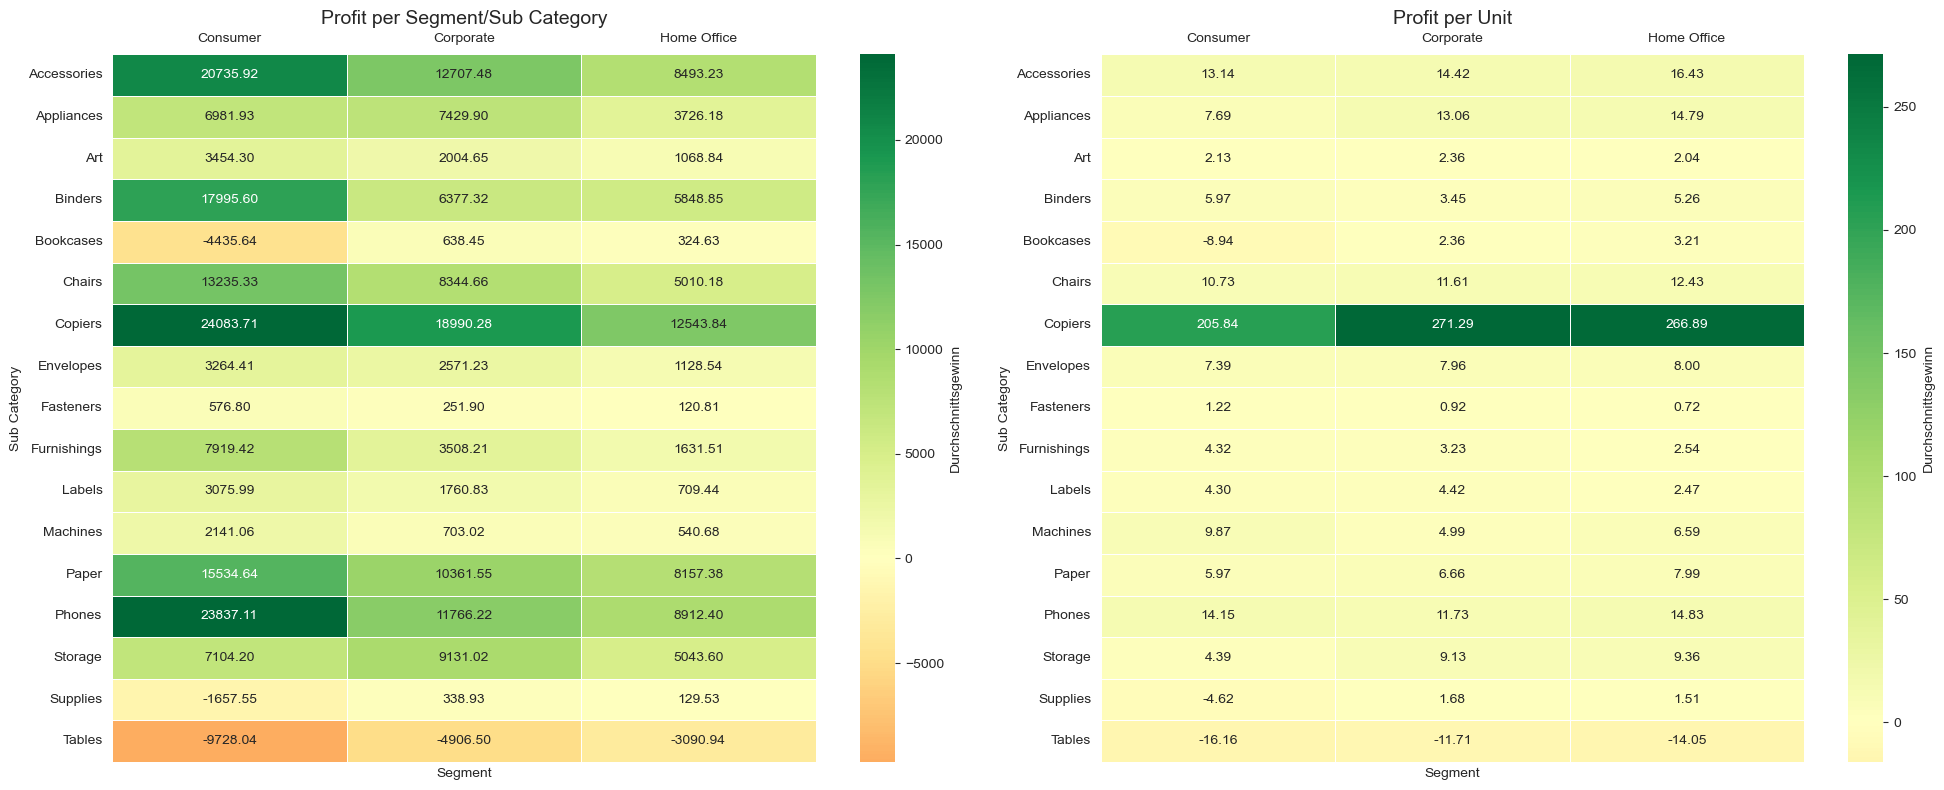

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8)) 
gen_plot(
    df_profit_sum_sub_category_segment, 
    None, 
    "Profit per Segment/Sub Category", 
    "Segment", 
    "Sub Category", 
    ax=ax1 
)
gen_plot(
    df_profit_sum_sub_category_segment, 
    df_quantity_sum_sub_category_segment, 
    "Profit per Unit", 
    "Segment", 
    "Sub Category", 
    ax=ax2 
)
plt.tight_layout()
plt.show()

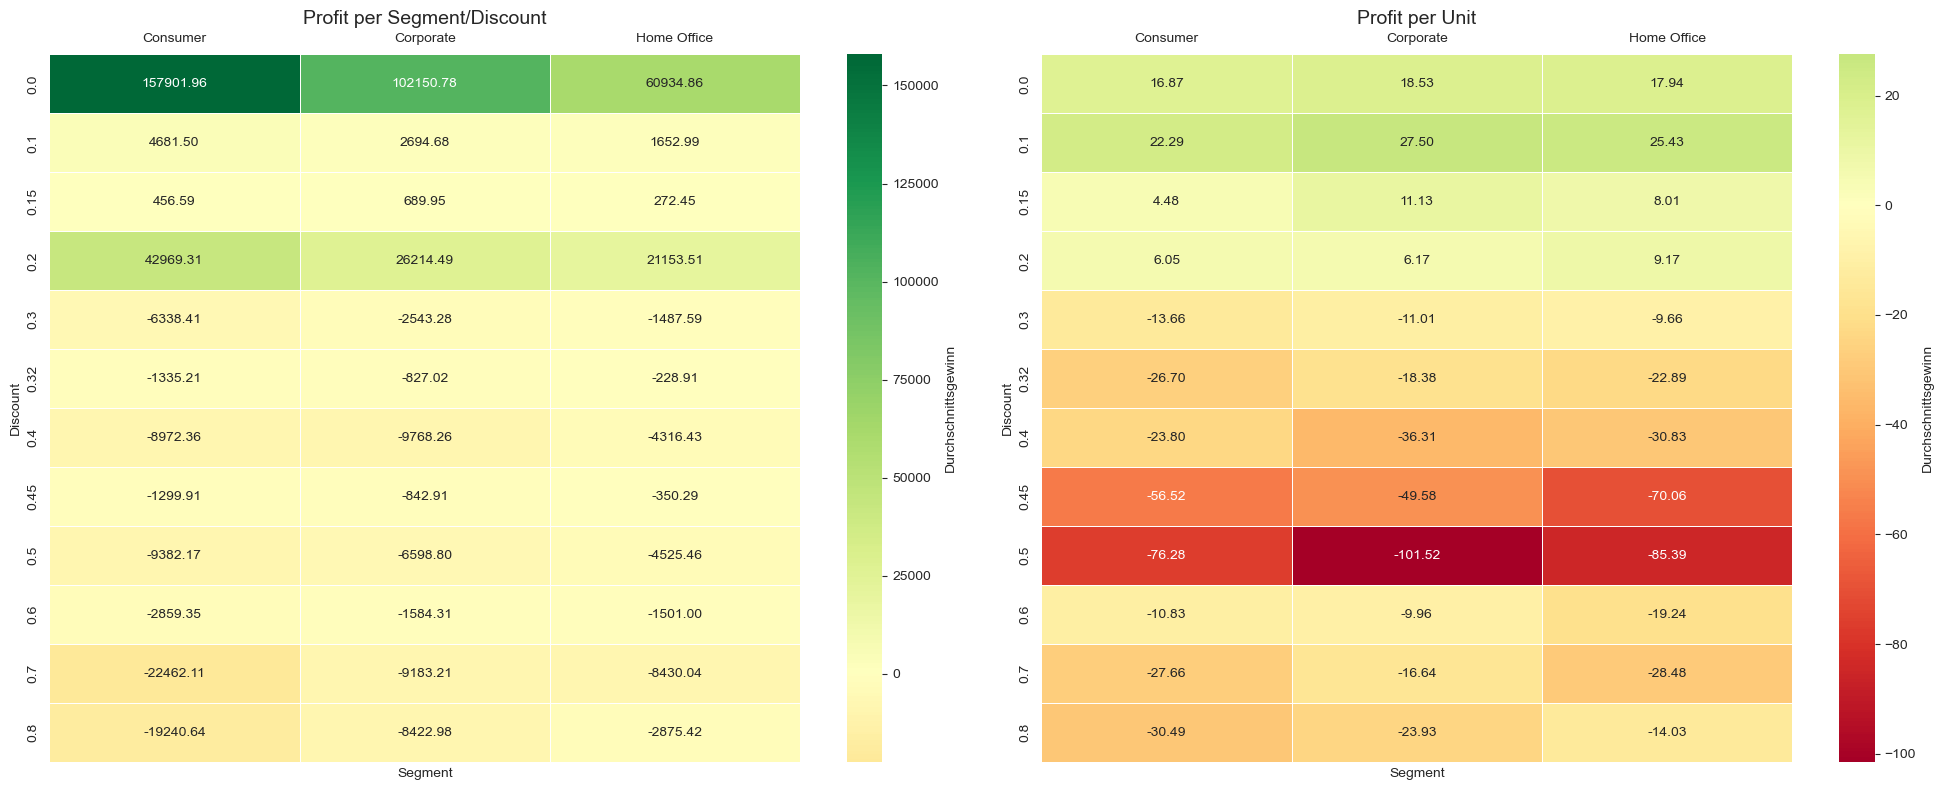

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8)) 
gen_plot(
    df_profit_sum_discount_segment, 
    None, 
    "Profit per Segment/Discount", 
    "Segment", 
    "Discount", 
    ax=ax1 
)
gen_plot(
    df_profit_sum_discount_segment, 
    df_quantity_sum_discount_segment, 
    "Profit per Unit", 
    "Segment", 
    "Discount", 
    ax=ax2 
)
plt.tight_layout()
plt.show()

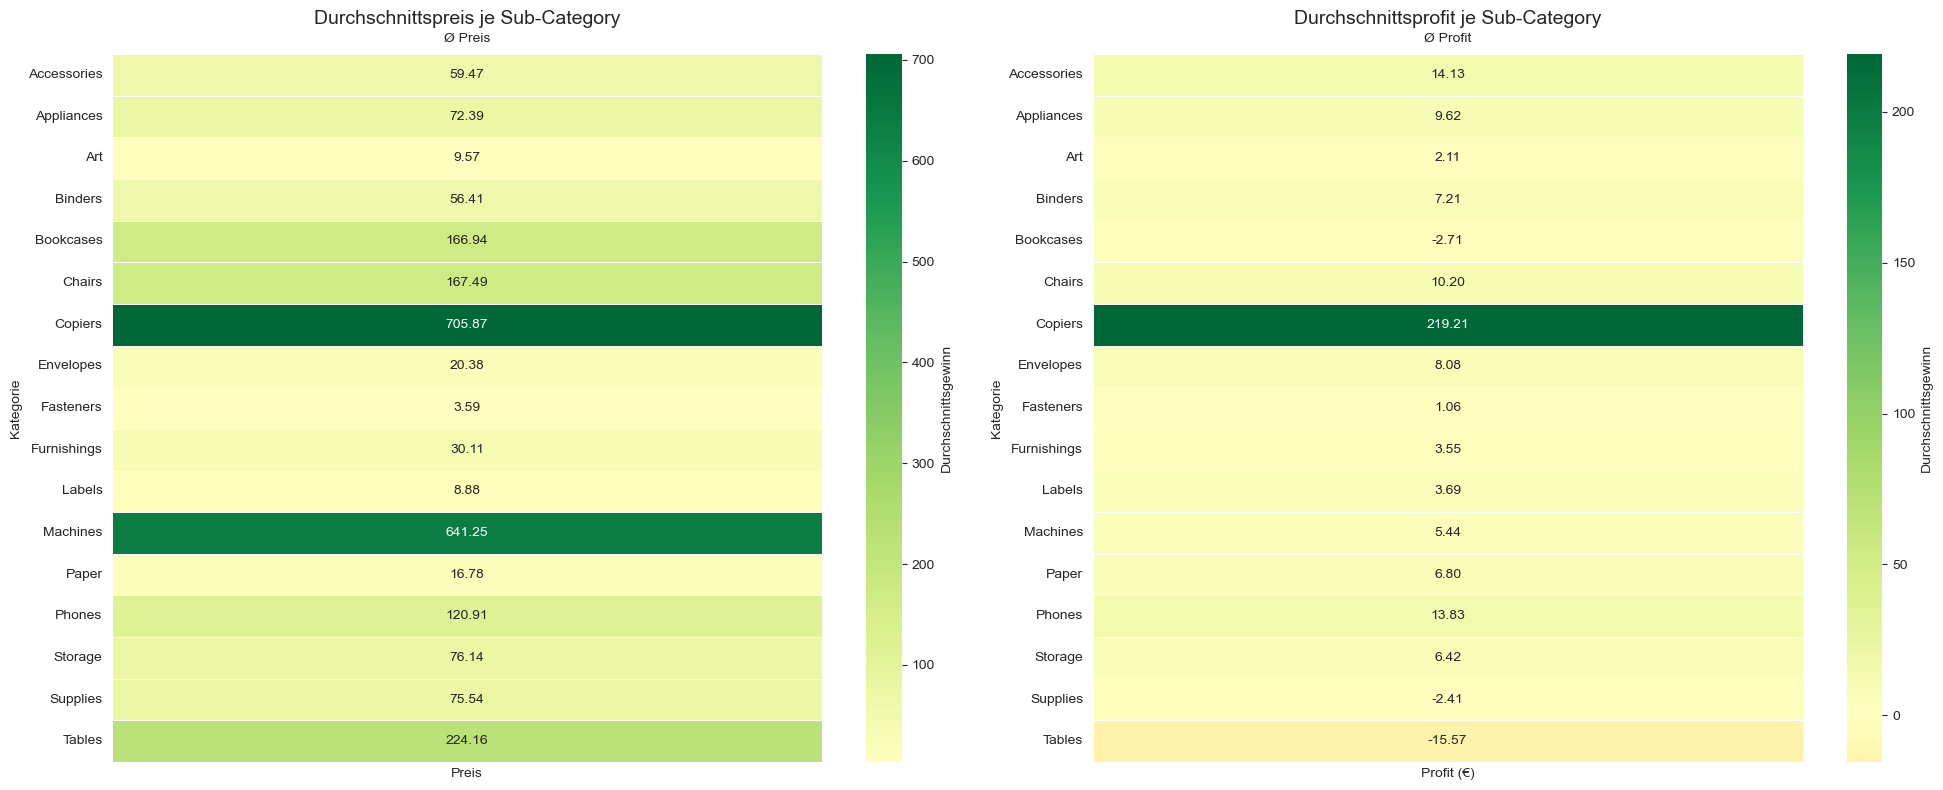

In [ ]:
df_avg_price = df.groupby('sub_category')['original_price_per_unit'].mean().to_frame(name='Ø Preis')
df_avg_profit = df.groupby('sub_category')['profit_per_unit'].mean().to_frame(name='Ø Profit')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

gen_plot(
    df_values=df_avg_price,
    title="Durchschnittspreis je Sub-Category",
    xlabel="Preis",
    ylabel="Kategorie",
    ax=ax1
)

gen_plot(
    df_values=df_avg_profit,
    title="Durchschnittsprofit je Sub-Category",
    xlabel="Profit (€)",
    ylabel="Kategorie",
    ax=ax2
)

plt.tight_layout()
plt.show()

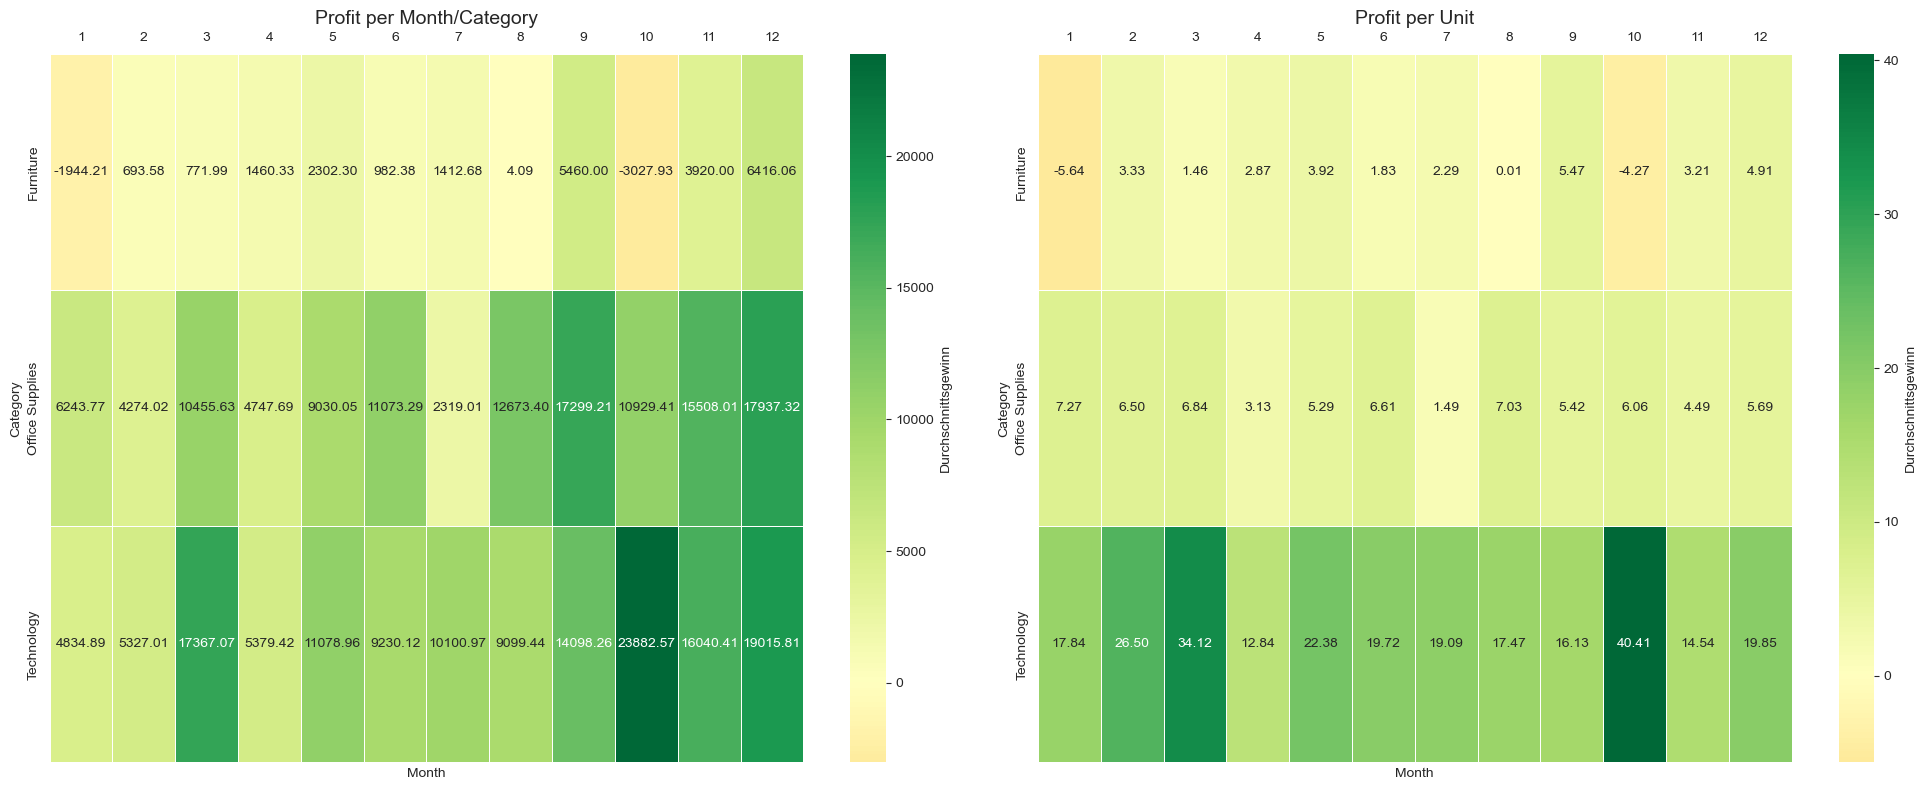

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8)) 
gen_plot(
    df_profit_sum_category_month, 
    None, 
    "Profit per Month/Category", 
    "Month", 
    "Category", 
    ax=ax1 
)
gen_plot(
    df_profit_sum_category_month, 
    df_quantity_sum_category_month, 
    "Profit per Unit", 
    "Month", 
    "Category", 
    ax=ax2 
)
plt.tight_layout()
plt.show()

## Korrelationen

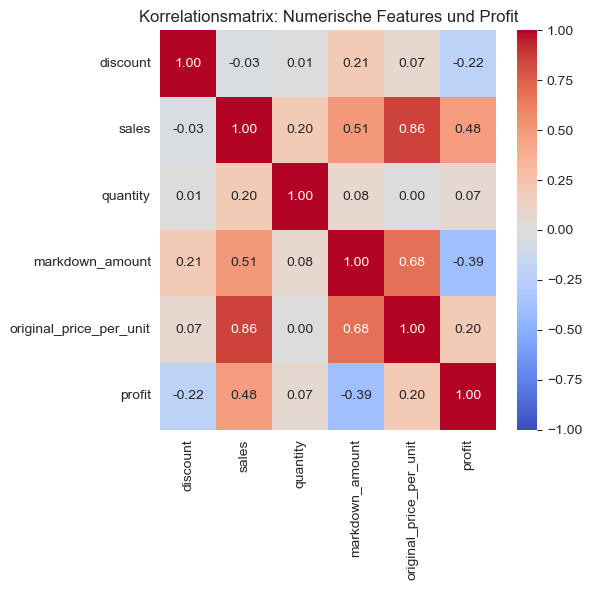

In [28]:
numerical_features = ['sales', 'quantity', 'discount', 'original_price_per_unit', 'markdown_amount']
columns_to_analyze = list(set(numerical_features + ['profit']))

corr_matrix = df[columns_to_analyze].corr()

plt.figure(figsize=(6, 6))
sns.heatmap(
    corr_matrix, 
    annot=True,       
    cmap='coolwarm',  
    vmin=-1, vmax=1,  
    center=0,        
    fmt=".2f"     
)
plt.title('Korrelationsmatrix: Numerische Features und Profit')
plt.tight_layout()
plt.show()